### Simple Linear Regresion
- computing slope and intercept using OLS using random data
- compute r_squared
- try on toy height_weight dataset

#### Build the model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from utils.statistics import *
style.use('ggplot')

In [20]:
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

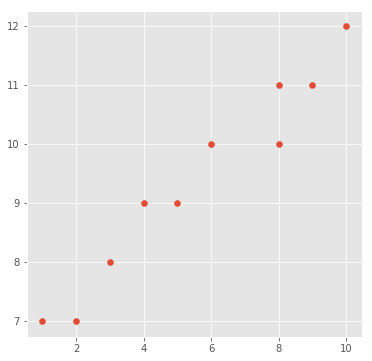

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)

$$\hat m = \rho \frac{S_Y}{S_X}$$

With $\rho$ being the correlation coefficient and  ${S_Y}$ and ${S_X}$ The standard deviation of $x$ and $y$ respectively. It can be shown that this is also equal to:

$$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$$

In [23]:
def compute_slope(X, Y):
    
    nominator = np.mean(X) * np.mean(Y) - np.mean(X*Y)
    denominator = np.square(np.mean(X)) - np.mean(np.square(X))

    return nominator / denominator

compute_slope(X,Y)   

0.5393518518518512

In [26]:
def best_fit_params(X, Y):
    
    m_hat = compute_slope(X, Y)
    
    intercept = np.mean(Y) - m_hat * np.mean(X)
    
    return m_hat, intercept
m, c = best_fit_params(X, Y)
m, c

(0.5393518518518512, 6.379629629629633)

In [50]:
def regresssion_line(m, c, X):
    
    y_hat = m*X + c
    
    return y_hat

y_hat = regresssion_line(m, c, X)

In [51]:
y_hat

array([ 6.91898148,  7.45833333,  7.99768519,  8.53703704,  9.07638889,
        9.61574074, 10.69444444, 10.69444444, 11.2337963 , 11.77314815])

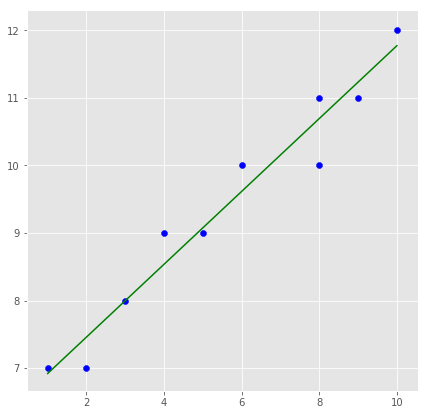

In [39]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(X, y_hat, color='green', label='regression_line')
ax.scatter(X, Y, color='blue', label=''), 

In [41]:
x_new = 7
y_new = regresssion_line(m, c, x_new)
y_new

10.155092592592592

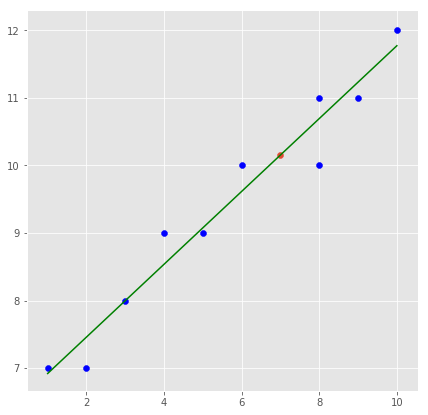

In [42]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(X, y_hat, color='green', label='regression_line')
ax.scatter(X, Y, color='blue', label=''), 
ax.scatter(x_new, y_new)

### Coefficient of Determination $$R^2$$
- a statistical meansure that is used to assess the goodness of fit of a regressiion model

In [54]:
def square_error(y_hat, y):
    
    y_mean = np.mean(y)
    
    nominator = np.sum(np.square(y - y_hat))
    denominator = np.sum(np.square(y - y_mean))
    
    return 1 - nominator / denominator

y_ = np.array([1,3,5,7])
y = np.array([1,5,5,10])

r_squared = square_error(y_, y)
r_squared

0.6809815950920246

In [53]:
r_squared = square_error(y_hat, Y)

r_squared

0.9520377384960719

#### Applying Model on height_weight dataset

In [96]:
h_w = pd.read_csv('data/height_weight.csv')

In [78]:
h_w.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'height', 'weight ', 'weight'], dtype='object')

In [97]:
h_w

,Unnamed: 0,Unnamed: 0.1,height,weight
0,0,0,150,45
1,1,1,160,50
2,2,2,162,51
3,3,3,155,50
4,4,4,168,55
5,5,5,170,55
6,6,6,172,60
7,7,7,173,60
8,8,8,174,65
9,9,9,171,65


In [108]:
arr_height = h_w.height
arr_weight = h_w.weight

In [111]:
m_ = compute_slope(h_w.height, h_w.weight)
m_

0.8182468694097071

In [114]:
m_, c_ = best_fit_params(h_w.height, h_w.weight)
m_, c_

(0.8182468694097071, -79.39570661897017)

In [115]:
y_ = regresssion_line(m_, c_, h_w.height)

(<matplotlib.collections.PathCollection at 0x7ff2d30fad68>,)

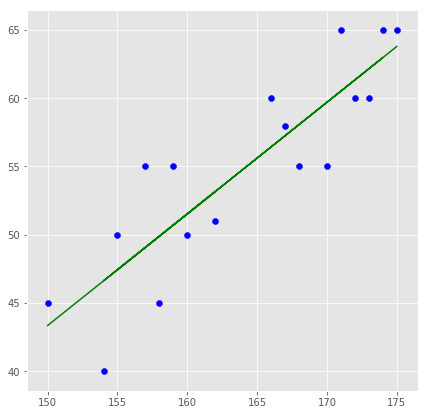

In [116]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(h_w.height, y_, color='green', label='regression_line')
ax.scatter(h_w.height, h_w.weight, color='blue', label='observed_data'), 

In [118]:
x_n = 167
y_n = regresssion_line(m_, c_, x_n)

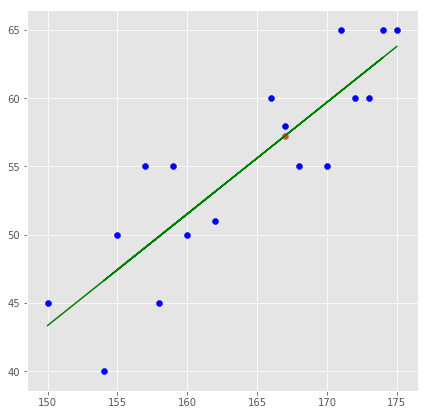

In [119]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(h_w.height, y_, color='green', label='regression_line')
ax.scatter(h_w.height, h_w.weight, color='blue', label='observed_data'), 
ax.scatter(x_n, y_n)

In [122]:
square_r = square_error(h_w.weight, y_)
square_r

0.6752741536974152